In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('laptop_data.csv')

In [4]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
data.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
data[data['Inches'] == 18.4]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
177,177,MSI,Gaming,18.4,Full HD 1920x1080,Intel Core i7 6920HQ 2.9GHz,32GB,512GB SSD + 1TB HDD,Nvidia GTX 980 SLI,Windows 10,4.4kg,149130.72


In [8]:
data[data['Price']==324954.72]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
196,196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,324954.72


In [9]:
#no outliers
#the column unnamed:0 hols no values
data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [12]:
# let's convert ram and weights into int and float
data['Ram'] = data['Ram'].str.replace('GB','')

In [13]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [14]:
data['Weight'] = data['Weight'].str.replace('kg','')
data['Ram'] = data['Ram'].astype('int')
data['Weight'] = data['Weight'].astype('float')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


In [16]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
935,HP,Netbook,12.5,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,88924.3200
1162,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,47898.7200
628,Asus,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,1.50,34046.4528
473,Dell,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.42,98133.7680
938,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,87325.9200


In [17]:
data['Company']

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
         ...  
1298    Lenovo
1299    Lenovo
1300    Lenovo
1301        HP
1302      Asus
Name: Company, Length: 1303, dtype: object

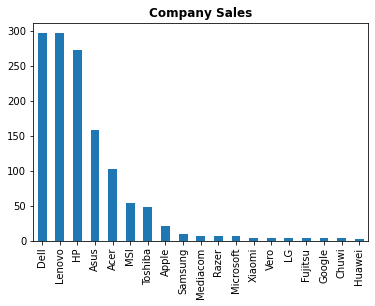

In [18]:
#lets analyse highest laptop sold companies
def plot_univariables(col_name, title):
    data[col_name].value_counts().plot(kind = 'bar')
    plt.title(title, weight='bold')
    plt.show()
    
plot_univariables('Company','Company Sales')

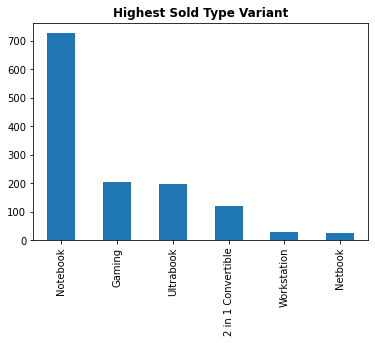

In [19]:
#check for highest sold type name
plot_univariables('TypeName','Highest Sold Type Variant')

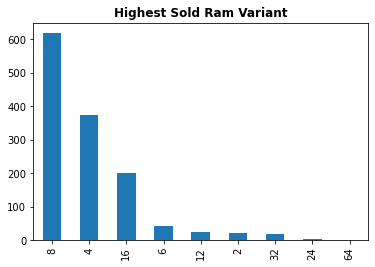

In [20]:
#lets check for highest sold ram
plot_univariables('Ram','Highest Sold Ram Variant')

In [21]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

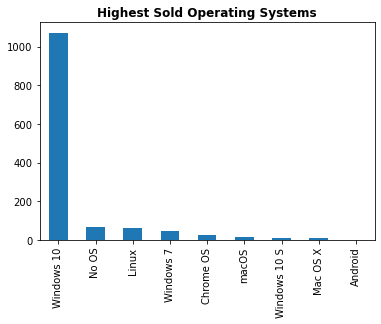

In [22]:
plot_univariables('OpSys','Highest Sold Operating Systems')

In [23]:
data.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
942,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.23,32980.32


In [24]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [25]:
# let's check for screentouch and IPS panels
data['Touch_screen'] = data['ScreenResolution'].map(lambda x: 1 if 'Touchscreen' in x else 0)
data['IPS_Panels'] = data['ScreenResolution'].map(lambda x: 1 if 'IPS Panel' in x else 0)

In [26]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,IPS_Panels
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [27]:
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,IPS_Panels
1093,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,AMD Radeon 530,Windows 10,1.40,43601.688,0,1
894,MSI,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43,141138.720,0,1
1157,Lenovo,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12,512GB SSD,Intel HD Graphics 520,Windows 7,1.40,122490.720,0,0
1241,Asus,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.45,68198.400,0,0
1186,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,2.09,62817.120,1,0
78,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,28238.400,0,0
1237,Dell,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,2.24,39267.360,0,0
1177,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31,69530.400,0,1
963,Toshiba,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.10,95371.200,1,0
363,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,1.86,34045.920,0,0


In [28]:
# let's split the screen resolution
new_df = data['ScreenResolution'].str.split('x', expand=True)

In [29]:
new_df

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [30]:
data['X_res'] = new_df[0]
data['y_res'] = new_df[1]

In [31]:
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,IPS_Panels,X_res,y_res
620,HP,Notebook,14.0,1366x768,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.31,59886.7200,0,0,1366,768
1050,Lenovo,Notebook,14.0,IPS Panel 2560x1440,Intel Core i7 6600U 2.6GHz,16,256GB SSD,Intel HD Graphics 520,Windows 7,1.10,139593.6000,0,1,IPS Panel 2560,1440
1209,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.20,130482.7200,0,0,Full HD 1920,1080
968,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,167778.7200,0,1,IPS Panel Full HD 1920,1080
1266,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,0,0,Full HD 1920,1080
1031,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,6,1TB HDD,AMD Radeon R5,Windows 10,2.10,21791.5200,0,0,1366,768
689,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4,500GB HDD,Intel HD Graphics 510,Windows 10,2.10,16943.0400,0,0,1366,768
537,HP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N3710 1.6GHz,4,256GB SSD,Intel HD Graphics 405,Windows 10,1.86,21258.1872,0,0,Full HD 1920,1080
847,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,512GB SSD,Nvidia GeForce 940M,Windows 10,1.45,54665.2800,0,1,IPS Panel Full HD 1920,1080
242,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,No OS,2.69,47365.9200,0,0,Full HD 1920,1080


In [32]:
# let's only extract the numbers from x_res
data['X_res'] = data['X_res'].str.extract('(\d+)')

In [33]:
data.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,IPS_Panels,X_res,y_res
291,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,63243.36,0,0,1920,1080
767,Dell,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72,58554.72,1,1,4,2160


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touch_screen      1303 non-null   int64  
 12  IPS_Panels        1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  y_res             1303 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 152.8+ KB


In [35]:
data['X_res'] = data['X_res'].astype('int')
data['y_res'] = data['y_res'].astype('int')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touch_screen      1303 non-null   int64  
 12  IPS_Panels        1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [37]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,IPS_Panels,X_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [38]:
# let's drop screen resolution column
data.drop('ScreenResolution', axis=1, inplace=True)

In [39]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,IPS_Panels,X_res,y_res
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


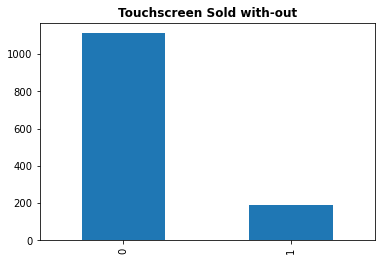

In [40]:
# check for touchscreen sold
plot_univariables('Touch_screen','Touchscreen Sold with-out')

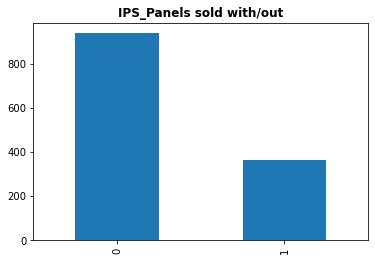

In [41]:
plot_univariables('IPS_Panels', 'IPS_Panels sold with/out')

In [42]:
data.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touch_screen    0.191226
IPS_Panels      0.252208
X_res           0.083832
y_res           0.552809
Name: Price, dtype: float64

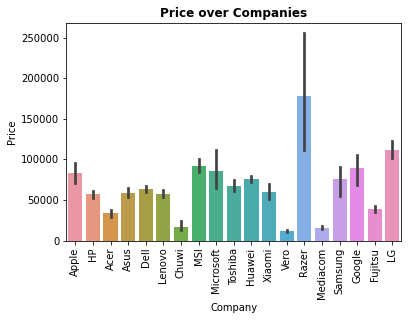

In [43]:
#multivariate analysis
def plot_multivariate(title,x_axis,y_axis = data['Price']):
    sns.barplot(x = data[x_axis], y = y_axis)
    plt.xticks(rotation = 'vertical')
    plt.title(title, weight='bold')
    plt.show()
    
plot_multivariate('Price over Companies','Company')

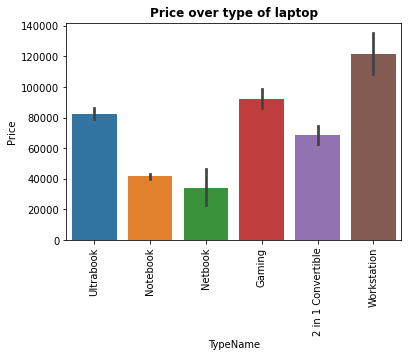

In [44]:
#check for price over different laptop types
plot_multivariate('Price over type of laptop','TypeName')

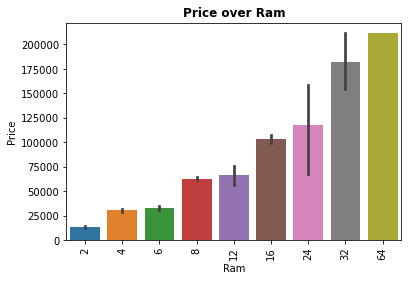

In [45]:
#check for the price over ram
plot_multivariate('Price over Ram','Ram')

##### It's an increasing trend between Price and Ram

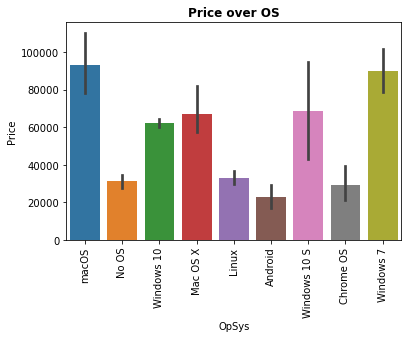

In [46]:
# check for the highest price os
plot_multivariate('Price over OS', 'OpSys')

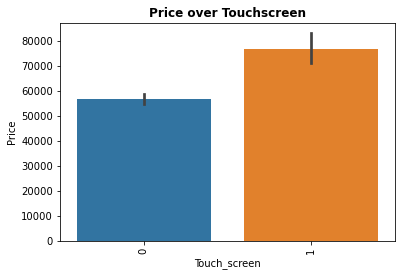

In [47]:
# check for the Touch_screen price 
plot_multivariate('Price over Touchscreen','Touch_screen')


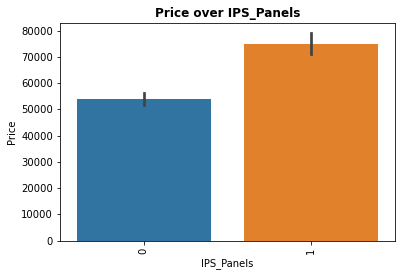

In [48]:
# check for price over IPS_Panels
plot_multivariate('Price over IPS_Panels','IPS_Panels')

In [49]:
data['cpu_name'] = data['Cpu'].map(lambda x:' '.join(x.split()[0:3]))

In [50]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,IPS_Panels,X_res,y_res,cpu_name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5


In [51]:
data['cpu_name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
AMD A9-Series 9410            3
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD E-Series 7110             2
AMD A9-Series A9-9420         2
AMD A10-Series A10-9620P      2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
Intel Atom X5-Z8350           2
AMD A6-Series A6-9220         2
AMD E-Series E2-9000e         2
Samsung Cortex A72&A53        1
AMD E-Series 9000e            1
AMD A6-Series 7310            1
AMD E-Series E2-6110          1
AMD Ryzen 1600                1
Intel At

In [52]:
def find_cpu_processor(x):
    if x == 'Intel Core i7' or x == 'Intel Core i5' or x == 'Intel Core i3':
        return x
    elif x.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [53]:
data['cpu_name'] = data['cpu_name'].map(find_cpu_processor)

In [54]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,IPS_Panels,X_res,y_res,cpu_name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5


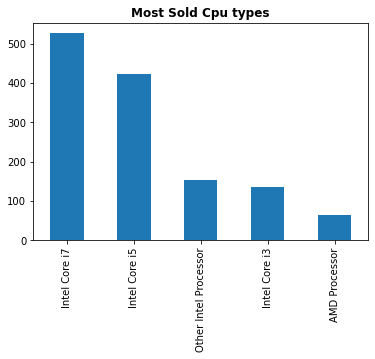

In [55]:
plot_univariables('cpu_name','Most Sold Cpu types')

In [56]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

In [57]:
# let's convert this whole into 4 types
def category_OS(os):
    if os == 'Windows 10' or os == 'Windows 7' or os == 'Windows 10 S':
        return 'Windows'
    elif os == 'macOS' or os == 'Mac OS X':
        return 'MacOS'
    elif os == 'Linux':
        return os
    else:
        return 'No OS/ Other OS'
    
data['OS Type'] = data['OpSys'].map(category_OS)

In [58]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,MacOS
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,MacOS
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,No OS/ Other OS
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,MacOS
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,MacOS


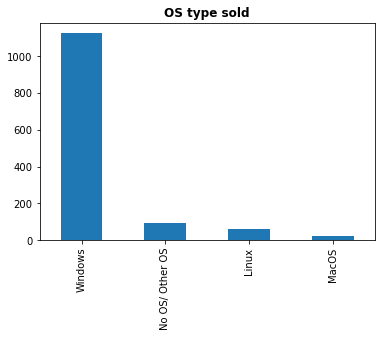

In [59]:
plot_univariables('OS Type','OS type sold')

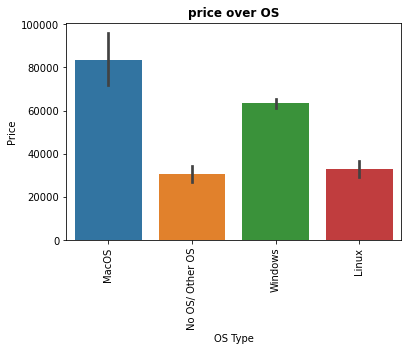

In [60]:
plot_multivariate('price over OS','OS Type')

In [61]:
data.drop(['Cpu','OpSys'], axis=1, inplace=True)

In [62]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,Weight,Price,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,2560,1600,Intel Core i5,MacOS
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,1440,900,Intel Core i5,MacOS
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,1920,1080,Intel Core i5,No OS/ Other OS
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,0,1,2880,1800,Intel Core i7,MacOS
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,2560,1600,Intel Core i5,MacOS


In [63]:
data.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touch_screen    0.191226
IPS_Panels      0.252208
X_res           0.083832
y_res           0.552809
Name: Price, dtype: float64

In [64]:
data['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
13.9      6
13.5      6
12.0      6
12.3      5
15.4      4
10.1      4
15.0      4
13.0      2
18.4      1
14.1      1
17.0      1
11.3      1
Name: Inches, dtype: int64

In [65]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,Weight,Price,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,2560,1600,Intel Core i5,MacOS
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,1440,900,Intel Core i5,MacOS
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,1920,1080,Intel Core i5,No OS/ Other OS
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,0,1,2880,1800,Intel Core i7,MacOS
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,2560,1600,Intel Core i5,MacOS


In [66]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia GeForce 960M          1
AMD Radeon R7 M365X          1
Nvidia GTX 980 SLI           1
Intel HD Graphics 540        1
AMD Radeon RX 560            1
Name: Gpu, Length: 110, dtype: int64

In [67]:
data['gpu'] = data['Gpu'].map(lambda x: x.split()[0])

In [68]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,Weight,Price,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,2560,1600,Intel Core i5,MacOS,Intel
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,1440,900,Intel Core i5,MacOS,Intel
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,0,1,2880,1800,Intel Core i7,MacOS,AMD
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,2560,1600,Intel Core i5,MacOS,Intel


In [69]:
data['gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu, dtype: int64

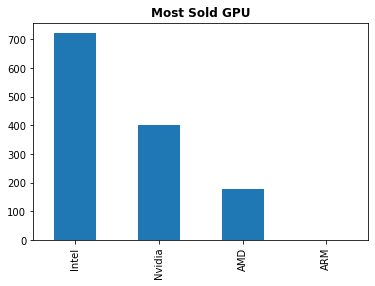

In [70]:
plot_univariables('gpu','Most Sold GPU')

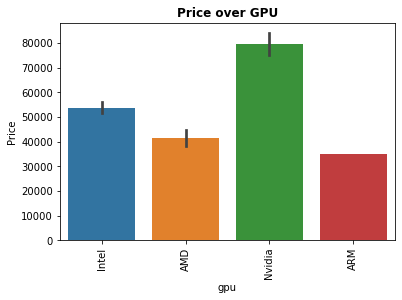

In [71]:
plot_multivariate('Price over GPU','gpu')

In [72]:
data.drop('Gpu', axis=1, inplace=True)

In [73]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Price,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu
0,Apple,Ultrabook,13.3,8,128GB SSD,1.37,71378.6832,0,1,2560,1600,Intel Core i5,MacOS,Intel
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,1.34,47895.5232,0,0,1440,900,Intel Core i5,MacOS,Intel
2,HP,Notebook,15.6,8,256GB SSD,1.86,30636.0000,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel
3,Apple,Ultrabook,15.4,16,512GB SSD,1.83,135195.3360,0,1,2880,1800,Intel Core i7,MacOS,AMD
4,Apple,Ultrabook,13.3,8,256GB SSD,1.37,96095.8080,0,1,2560,1600,Intel Core i5,MacOS,Intel


In [74]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Memory', 'Weight', 'Price',
       'Touch_screen', 'IPS_Panels', 'X_res', 'y_res', 'cpu_name', 'OS Type',
       'gpu'],
      dtype='object')

In [75]:
data = data[['Company', 'TypeName','Inches', 'Ram', 'Memory', 'Weight','Touch_screen', 'IPS_Panels', 'X_res', 'y_res', 'cpu_name', 'OS Type',
       'gpu', 'Price',
       ]]

In [76]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price
0,Apple,Ultrabook,13.3,8,128GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232
2,HP,Notebook,15.6,8,256GB SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000
3,Apple,Ultrabook,15.4,16,512GB SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360
4,Apple,Ultrabook,13.3,8,256GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Ram           1303 non-null   int64  
 4   Memory        1303 non-null   object 
 5   Weight        1303 non-null   float64
 6   Touch_screen  1303 non-null   int64  
 7   IPS_Panels    1303 non-null   int64  
 8   X_res         1303 non-null   int64  
 9   y_res         1303 non-null   int64  
 10  cpu_name      1303 non-null   object 
 11  OS Type       1303 non-null   object 
 12  gpu           1303 non-null   object 
 13  Price         1303 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 142.6+ KB


In [78]:
data['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [79]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price
0,Apple,Ultrabook,13.3,8,128GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232
2,HP,Notebook,15.6,8,256GB SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000
3,Apple,Ultrabook,15.4,16,512GB SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360
4,Apple,Ultrabook,13.3,8,256GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080


In [80]:
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
1TB SSD +  1TB HDD                 2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
128GB HDD                          1
3

In [81]:
# convert this into four categories

* SSD
* HDD
* Flash Storage
* Hybrid

In [82]:
df = data.copy()

In [83]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price
0,Apple,Ultrabook,13.3,8,128GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232
2,HP,Notebook,15.6,8,256GB SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000
3,Apple,Ultrabook,15.4,16,512GB SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360
4,Apple,Ultrabook,13.3,8,256GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080


In [84]:
df['ssd'] =  df['Memory'].map(lambda x: 1 if 'SSD' in x else 0)

In [85]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,ssd
0,Apple,Ultrabook,13.3,8,128GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832,1
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232,0
2,HP,Notebook,15.6,8,256GB SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000,1
3,Apple,Ultrabook,15.4,16,512GB SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360,1
4,Apple,Ultrabook,13.3,8,256GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080,1


In [86]:
df['hdd'] = df['Memory'].map(lambda x: 1 if 'HDD' in x else 0)

In [87]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,ssd,hdd
371,Acer,Notebook,15.6,4,128GB SSD,2.10,0,0,1366,768,AMD Processor,Windows,AMD,22697.2800,1,0
409,Lenovo,Notebook,11.6,2,32GB Flash Storage,1.15,0,0,1366,768,Other Intel Processor,Windows,Intel,16221.0960,0,0
897,HP,Notebook,15.6,8,1TB HDD,2.04,0,0,1920,1080,Intel Core i7,Windows,Nvidia,47952.0000,0,1
234,Acer,2 in 1 Convertible,13.3,8,256GB SSD,1.60,1,1,1920,1080,Intel Core i5,Windows,Intel,36709.9200,1,0
1055,HP,Notebook,15.6,4,500GB HDD,2.31,0,0,1366,768,Intel Core i3,Windows,Intel,37570.3920,0,1
785,MSI,Gaming,14.0,16,256GB SSD + 1TB HDD,1.60,0,1,1920,1080,Intel Core i7,Windows,Nvidia,100752.4800,1,1
895,Toshiba,Notebook,13.3,8,256GB SSD,1.05,0,0,1920,1080,Intel Core i5,Windows,Intel,78588.0000,1,0
679,Acer,Gaming,15.6,16,256GB SSD,2.50,0,0,1920,1080,Intel Core i5,Windows,Nvidia,69210.7200,1,0
351,HP,Notebook,15.6,8,256GB SSD,1.84,0,0,1920,1080,Intel Core i7,Windows,Intel,69477.1200,1,0
501,HP,Notebook,15.6,8,256GB SSD,1.91,0,0,1366,768,Intel Core i5,Windows,AMD,32979.7872,1,0


In [88]:
df['flash_storage'] = df['Memory'].map(lambda x: 1 if 'Flash Storage' in x else 0)

In [89]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,ssd,hdd,flash_storage
0,Apple,Ultrabook,13.3,8,128GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832,1,0,0
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232,0,0,1
2,HP,Notebook,15.6,8,256GB SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000,1,0,0
3,Apple,Ultrabook,15.4,16,512GB SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360,1,0,0
4,Apple,Ultrabook,13.3,8,256GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080,1,0,0


In [90]:
df['hybrid'] = df['Memory'].map(lambda x: 1 if 'Hybrid' in x else 0)

In [91]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,ssd,hdd,flash_storage,hybrid
589,Asus,Gaming,17.3,8,128GB SSD + 1TB HDD,2.73,0,1,1920,1080,Intel Core i5,Windows,Nvidia,94305.6000,1,1,0,0
1204,Asus,Gaming,15.6,8,1TB HDD,2.20,0,0,1920,1080,Intel Core i7,Windows,Nvidia,62284.3200,0,1,0,0
541,Dell,Notebook,14.0,4,128GB SSD,1.60,0,0,1920,1080,Intel Core i3,Windows,Intel,39207.1536,1,0,0,0
315,Dell,Notebook,15.6,8,128GB SSD + 1TB HDD,2.33,0,0,1920,1080,Intel Core i5,Windows,AMD,44968.3200,1,1,0,0
461,Acer,Netbook,11.6,4,128GB SSD,1.40,0,0,1366,768,Other Intel Processor,Windows,Intel,23176.8000,1,0,0,0
1216,Acer,Notebook,17.3,4,1TB HDD,3.30,0,0,1600,900,Intel Core i3,Windows,Nvidia,31861.4400,0,1,0,0
446,Acer,Notebook,15.6,4,500GB HDD,2.40,0,0,1366,768,Intel Core i5,Linux,Intel,23539.1040,0,1,0,0
843,Dell,Notebook,15.6,8,128GB SSD,2.18,0,0,1366,768,Intel Core i5,Windows,Intel,38041.3872,1,0,0,0
892,Samsung,Ultrabook,15.0,8,256GB SSD,1.17,0,0,1920,1080,Intel Core i7,Windows,Intel,90522.7200,1,0,0,0
1231,Razer,Gaming,14.0,16,1TB SSD,1.95,0,0,1920,1080,Intel Core i7,Windows,Nvidia,186426.7200,1,0,0,0


In [92]:
df.corr()['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Touch_screen     0.191226
IPS_Panels       0.252208
X_res            0.083832
y_res            0.552809
Price            1.000000
ssd              0.513609
hdd             -0.169901
flash_storage   -0.210823
hybrid           0.007051
Name: Price, dtype: float64

In [93]:
df['Memory'] = df['Memory'].str.replace('TB','000')

In [94]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,ssd,hdd,flash_storage,hybrid
0,Apple,Ultrabook,13.3,8,128GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832,1,0,0,0
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232,0,0,1,0
2,HP,Notebook,15.6,8,256GB SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000,1,0,0,0
3,Apple,Ultrabook,15.4,16,512GB SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360,1,0,0,0
4,Apple,Ultrabook,13.3,8,256GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080,1,0,0,0


In [95]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,ssd,hdd,flash_storage,hybrid
0,Apple,Ultrabook,13.3,8,128GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832,1,0,0,0
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232,0,0,1,0
2,HP,Notebook,15.6,8,256GB SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000,1,0,0,0
3,Apple,Ultrabook,15.4,16,512GB SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360,1,0,0,0
4,Apple,Ultrabook,13.3,8,256GB SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080,1,0,0,0


In [96]:
new = df['Memory'].str.split('+', expand=True)

In [97]:
new.sample(20)

,0,1
35,64GB Flash Storage,None
388,256GB SSD,None
338,1000 HDD,None
1132,32GB Flash Storage,None
378,32GB Flash Storage,None
307,256GB SSD,None
723,1000 SSD,1000 HDD
1216,1000 HDD,None
919,128GB SSD,1000 HDD
175,1000 HDD,None


In [98]:
def take_action(x):
    if 'SSD' in x:
        x.str.extract('(\d+)')
        df['ssd'] = df['ssd'] * x

In [99]:
df['Memory'] = df['Memory'].str.replace('.\0','', regex=True)

In [100]:
new.columns

RangeIndex(start=0, stop=2, step=1)

In [101]:
import re

In [102]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,ssd,hdd,flash_storage,hybrid
123,HP,Notebook,17.3,16,512GB SSD,2.50,0,0,1920,1080,Intel Core i7,Windows,Nvidia,67718.8800,1,0,0,0
877,Xiaomi,Ultrabook,13.3,8,256GB SSD,1.28,0,1,1920,1080,Intel Core i5,Windows,Nvidia,49816.8000,1,0,0,0
237,Asus,Notebook,15.6,4,128GB SSD + 1000 HDD,2.20,0,0,1920,1080,AMD Processor,Windows,AMD,30636.0000,1,1,0,0
94,Asus,Ultrabook,14.0,8,256GB SSD,1.25,0,0,1920,1080,Intel Core i7,Windows,Intel,55890.7200,1,0,0,0
87,HP,Notebook,15.6,8,256GB SSD,1.96,0,0,1920,1080,Intel Core i5,Windows,Intel,31914.1872,1,0,0,0
764,Dell,Notebook,13.3,4,500GB HDD,1.65,0,0,1366,768,Intel Core i3,Windows,Intel,45234.7200,0,1,0,0
1229,MSI,Gaming,15.6,8,128GB SSD + 1000 HDD,2.20,0,0,1920,1080,Intel Core i7,Windows,Nvidia,61218.7200,1,1,0,0
554,HP,Notebook,17.3,8,1000 HDD,2.63,0,0,1920,1080,Intel Core i7,Windows,Nvidia,68198.4000,0,1,0,0
118,Asus,Notebook,17.3,4,1000 HDD,2.00,0,0,1920,1080,Intel Core i3,Windows,Nvidia,30049.9200,0,1,0,0
153,MSI,Gaming,17.3,16,256GB SSD + 1000 HDD,2.80,0,0,1920,1080,Intel Core i7,Windows,Nvidia,100699.2000,1,1,0,0


In [103]:
df['Memory'] = df['Memory'].str.replace('GB','')

In [104]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,ssd,hdd,flash_storage,hybrid
174,HP,Notebook,17.3,8,256 SSD,2.50,0,0,1920,1080,Intel Core i5,Windows,Nvidia,49177.44,1,0,0,0
1167,Lenovo,Notebook,15.6,4,1000 HDD,2.20,0,0,1920,1080,Intel Core i3,Windows,Nvidia,24935.04,0,1,0,0
616,Dell,Notebook,15.6,4,128 SSD,2.18,0,0,1920,1080,Intel Core i5,Linux,AMD,30316.32,1,0,0,0
827,Dell,Notebook,14.0,4,500 HDD,1.76,0,0,1366,768,Intel Core i3,Windows,Intel,31168.80,0,1,0,0
1114,Lenovo,2 in 1 Convertible,10.1,4,64 Flash Storage,0.69,1,1,1920,1200,Other Intel Processor,No OS/ Other OS,Intel,29250.72,0,0,1,0


In [105]:
new = df['Memory'].str.split('+', expand=True)

In [106]:
df['mem_1'] = new[0]
df['mem_2'] = new[1]

In [107]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2
1032,MSI,Gaming,17.3,8,128 SSD + 1000 HDD,2.70,0,0,1920,1080,Intel Core i7,Windows,Nvidia,63499.1040,1,1,0,0,128 SSD,1000 HDD
16,Dell,Notebook,15.6,8,256 SSD,2.20,0,0,1920,1080,Intel Core i7,Windows,AMD,39693.6000,1,0,0,0,256 SSD,None
1133,HP,Ultrabook,15.6,8,256 SSD,1.84,0,0,1920,1080,Intel Core i7,Windows,Intel,40066.5600,1,0,0,0,256 SSD,None
76,Lenovo,Notebook,15.6,8,2000 HDD,2.20,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,27652.3200,0,1,0,0,2000 HDD,None
265,Dell,2 in 1 Convertible,15.6,8,256 SSD,2.67,1,0,1920,1080,Intel Core i5,Windows,Intel,42570.7200,1,0,0,0,256 SSD,None
766,Asus,Notebook,17.3,4,1000 HDD,2.80,0,0,1366,768,Other Intel Processor,Windows,Nvidia,25059.7152,0,1,0,0,1000 HDD,None
728,Dell,Notebook,15.6,8,1000 HDD,2.32,0,0,1366,768,Intel Core i5,Linux,AMD,31409.6256,0,1,0,0,1000 HDD,None
1119,Asus,Gaming,17.3,8,128 SSD + 1000 HDD,3.52,0,0,1920,1080,Intel Core i7,Windows,Nvidia,69929.4672,1,1,0,0,128 SSD,1000 HDD
693,Lenovo,2 in 1 Convertible,14.0,8,256 SSD,1.42,1,0,2560,1440,Intel Core i7,Windows,Intel,137995.2000,1,0,0,0,256 SSD,None
604,Dell,Notebook,15.6,4,1000 HDD,2.18,0,0,1366,768,Intel Core i3,Linux,AMD,24775.2000,0,1,0,0,1000 HDD,None


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Ram            1303 non-null   int64  
 4   Memory         1303 non-null   object 
 5   Weight         1303 non-null   float64
 6   Touch_screen   1303 non-null   int64  
 7   IPS_Panels     1303 non-null   int64  
 8   X_res          1303 non-null   int64  
 9   y_res          1303 non-null   int64  
 10  cpu_name       1303 non-null   object 
 11  OS Type        1303 non-null   object 
 12  gpu            1303 non-null   object 
 13  Price          1303 non-null   float64
 14  ssd            1303 non-null   int64  
 15  hdd            1303 non-null   int64  
 16  flash_storage  1303 non-null   int64  
 17  hybrid         1303 non-null   int64  
 18  mem_1   

In [109]:
df['mem_2'] = df['mem_2'].fillna('0')

In [110]:
df['mem_2'].isnull().sum()

0

In [111]:
df.shape

(1303, 20)

In [112]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2
862,Toshiba,Notebook,13.3,4,128 SSD,1.05,0,0,1920,1080,Intel Core i5,Windows,Intel,68464.800,1,0,0,0,128 SSD,0
292,HP,Notebook,17.3,8,1000 HDD,2.54,0,0,1600,900,Intel Core i3,Windows,Intel,26053.920,0,1,0,0,1000 HDD,0
410,Lenovo,Workstation,15.6,8,512 SSD,2.67,0,0,1920,1080,Intel Core i7,Windows,Nvidia,102564.000,1,0,0,0,512 SSD,0
953,Asus,2 in 1 Convertible,12.5,8,64 Flash Storage,1.20,0,0,1920,1080,Other Intel Processor,No OS/ Other OS,Intel,61751.520,0,0,1,0,64 Flash Storage,0
1282,HP,Netbook,11.6,2,32 Flash Storage,1.17,0,0,1366,768,Other Intel Processor,Windows,Intel,11135.520,0,0,1,0,32 Flash Storage,0
459,HP,Notebook,17.3,8,256 SSD,2.50,0,0,1600,900,Intel Core i3,Windows,Intel,34093.872,1,0,0,0,256 SSD,0
838,Lenovo,Notebook,14.0,4,16 Flash Storage,1.50,0,0,1366,768,Other Intel Processor,No OS/ Other OS,Intel,17316.000,0,0,1,0,16 Flash Storage,0
538,HP,Gaming,17.3,12,1000 HDD,2.62,0,0,1920,1080,Intel Core i7,Windows,Nvidia,95850.720,0,1,0,0,1000 HDD,0
675,MSI,Gaming,15.6,16,256 SSD + 1000 HDD,2.40,0,0,1920,1080,Intel Core i7,Windows,Nvidia,68944.320,1,1,0,0,256 SSD,1000 HDD
1041,Vero,Notebook,14.0,2,32 Flash Storage,1.45,0,0,1366,768,Other Intel Processor,Windows,Intel,11231.424,0,0,1,0,32 Flash Storage,0


In [113]:

df['new_ssd'] = df['mem_1'].map(lambda x: x if 'SSD'in x else 0)

In [114]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,OS Type,gpu,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,...,MacOS,Intel,71378.6832,1,0,0,0,128 SSD,0,128 SSD
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,...,MacOS,Intel,47895.5232,0,0,1,0,128 Flash Storage,0,0
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,...,No OS/ Other OS,Intel,30636.0000,1,0,0,0,256 SSD,0,256 SSD
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,...,MacOS,AMD,135195.3360,1,0,0,0,512 SSD,0,512 SSD
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,...,MacOS,Intel,96095.8080,1,0,0,0,256 SSD,0,256 SSD


In [115]:
df['new_hdd'] = df['mem_1'].map(lambda x: x if 'HDD' in x else 0)

In [116]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,gpu,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,new_hdd
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,...,Intel,71378.6832,1,0,0,0,128 SSD,0,128 SSD,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,...,Intel,47895.5232,0,0,1,0,128 Flash Storage,0,0,0
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,...,Intel,30636.0000,1,0,0,0,256 SSD,0,256 SSD,0
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,...,AMD,135195.3360,1,0,0,0,512 SSD,0,512 SSD,0
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,...,Intel,96095.8080,1,0,0,0,256 SSD,0,256 SSD,0


In [117]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,gpu,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,new_hdd
606,Toshiba,Notebook,15.6,8,256 SSD,2.20,0,1,1920,1080,...,Intel,74538.72,1,0,0,0,256 SSD,0,256 SSD,0
855,Dell,Notebook,15.6,8,128 SSD,1.90,0,0,1920,1080,...,Intel,50349.60,1,0,0,0,128 SSD,0,128 SSD,0
1218,Lenovo,Gaming,15.6,8,128 SSD + 1000 HDD,2.60,0,1,1920,1080,...,Nvidia,67772.16,1,1,0,0,128 SSD,1000 HDD,128 SSD,0
107,Asus,Ultrabook,14.0,8,256 SSD,1.30,0,1,1920,1080,...,Nvidia,63563.04,1,0,0,0,256 SSD,0,256 SSD,0
455,Dell,2 in 1 Convertible,11.6,4,500 HDD,1.47,1,0,1366,768,...,Intel,25521.12,0,1,0,0,500 HDD,0,0,500 HDD
132,Acer,Ultrabook,14.0,8,256 SSD,1.60,0,1,1920,1080,...,Intel,47099.52,1,0,0,0,256 SSD,0,256 SSD,0
1072,HP,Ultrabook,12.5,8,256 SSD,1.26,0,0,1920,1080,...,Intel,63882.72,1,0,0,0,256 SSD,0,256 SSD,0
333,Lenovo,Notebook,15.6,4,1000 HDD,1.85,0,0,1920,1080,...,Intel,23922.72,0,1,0,0,1000 HDD,0,0,1000 HDD
403,Acer,Notebook,15.6,8,256 SSD,2.50,0,0,1920,1080,...,Nvidia,46833.12,1,0,0,0,256 SSD,0,256 SSD,0
959,Acer,2 in 1 Convertible,11.6,4,32 Flash Storage,1.25,1,1,1366,768,...,Intel,20725.92,0,0,1,0,32 Flash Storage,0,0,0


In [118]:
df['new_hdd_2'] = df['mem_2'].map(lambda x: x if 'HDD' in x else 0)

In [119]:
df.sample(25)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,new_hdd,new_hdd_2
714,Dell,Notebook,15.6,16,512 SSD,1.93,0,0,1920,1080,...,76012.4448,1,0,0,0,512 SSD,0,512 SSD,0,0
799,Dell,Notebook,15.6,8,256 SSD,2.00,0,0,1920,1080,...,39373.9200,1,0,0,0,256 SSD,0,256 SSD,0,0
1147,Dell,Notebook,15.6,8,256 SSD,2.18,0,0,1920,1080,...,53807.4720,1,0,0,0,256 SSD,0,256 SSD,0,0
562,HP,Ultrabook,13.3,16,512 SSD,1.16,1,1,3200,1800,...,104695.2000,1,0,0,0,512 SSD,0,512 SSD,0,0
1238,MSI,Gaming,15.6,8,128 SSD + 1000 HDD,2.30,0,0,1920,1080,...,62284.3200,1,1,0,0,128 SSD,1000 HDD,128 SSD,0,1000 HDD
193,Lenovo,Notebook,17.3,8,256 SSD,2.80,0,0,1600,900,...,37189.4400,1,0,0,0,256 SSD,0,256 SSD,0,0
998,Asus,Gaming,15.6,16,256 SSD + 1000 HDD,2.50,0,0,1920,1080,...,95850.7200,1,1,0,0,256 SSD,1000 HDD,256 SSD,0,1000 HDD
1004,Toshiba,Notebook,13.3,4,128 SSD,1.20,0,0,1920,1080,...,63669.6000,1,0,0,0,128 SSD,0,128 SSD,0,0
858,Dell,Notebook,13.3,8,1000 HDD,1.62,1,0,1920,1080,...,34578.7200,0,1,0,0,1000 HDD,0,0,1000 HDD,0
1214,Asus,Gaming,17.3,16,256 SSD + 1000 HDD,2.90,0,0,1920,1080,...,103842.7200,1,1,0,0,256 SSD,1000 HDD,256 SSD,0,1000 HDD


In [120]:
df['new_hdd_2'].value_counts()

0             1101
  1000 HDD     185
  2000 HDD      15
  500 HDD        2
Name: new_hdd_2, dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Ram            1303 non-null   int64  
 4   Memory         1303 non-null   object 
 5   Weight         1303 non-null   float64
 6   Touch_screen   1303 non-null   int64  
 7   IPS_Panels     1303 non-null   int64  
 8   X_res          1303 non-null   int64  
 9   y_res          1303 non-null   int64  
 10  cpu_name       1303 non-null   object 
 11  OS Type        1303 non-null   object 
 12  gpu            1303 non-null   object 
 13  Price          1303 non-null   float64
 14  ssd            1303 non-null   int64  
 15  hdd            1303 non-null   int64  
 16  flash_storage  1303 non-null   int64  
 17  hybrid         1303 non-null   int64  
 18  mem_1   

In [122]:
df['new_hdd'].isnull().sum()

0

In [123]:
df['new_hdd_2'].isnull().sum()

0

In [124]:
df['new_hdd'] =  df['new_hdd'].str.extract('(\d+)')

In [125]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,new_hdd,new_hdd_2
143,Toshiba,Notebook,15.6,4,500 HDD,2.10,0,0,1366,768,...,32074.5600,0,1,0,0,500 HDD,0,0,500,0
663,HP,Notebook,15.6,6,1000 HDD,2.04,0,0,1920,1080,...,28717.9200,0,1,0,0,1000 HDD,0,0,1000,0
1099,Asus,Gaming,17.3,16,128 SSD + 1000 HDD,4.30,0,1,1920,1080,...,122490.7200,1,1,0,0,128 SSD,1000 HDD,128 SSD,NaN,1000 HDD
245,Dell,Notebook,15.6,8,128 SSD + 2000 HDD,2.20,0,0,1920,1080,...,52480.8000,1,1,0,0,128 SSD,2000 HDD,128 SSD,NaN,2000 HDD
67,HP,Notebook,14.0,4,32 SSD,1.44,0,0,1366,768,...,12201.1200,1,0,0,0,32 SSD,0,32 SSD,NaN,0
517,Asus,Gaming,15.6,24,512 SSD,2.24,0,0,1920,1080,...,158135.0400,1,0,0,0,512 SSD,0,512 SSD,NaN,0
1280,HP,Notebook,15.6,6,1.0000 Hybrid,2.04,0,0,1920,1080,...,29303.4672,0,0,0,1,1.0000 Hybrid,0,0,NaN,0
512,Dell,Notebook,15.6,8,1000 HDD,2.18,0,0,1920,1080,...,44542.0800,0,1,0,0,1000 HDD,0,0,1000,0
878,Dell,Notebook,15.6,4,128 SSD + 1000 HDD,2.18,0,0,1920,1080,...,48618.0000,1,1,0,0,128 SSD,1000 HDD,128 SSD,NaN,1000 HDD
264,Dell,Notebook,15.6,8,1000 HDD,2.24,0,0,1920,1080,...,30103.2000,0,1,0,0,1000 HDD,0,0,1000,0


In [126]:
df['new_hdd'] = df['new_hdd'].fillna(0)

In [127]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,new_hdd,new_hdd_2
215,Dell,Ultrabook,13.3,8,256 SSD,1.40,0,1,1920,1080,...,49650.5664,1,0,0,0,256 SSD,0,256 SSD,0,0
1137,Dell,Notebook,15.6,8,1000 HDD,2.50,0,0,1366,768,...,41771.5200,0,1,0,0,1000 HDD,0,0,1000,0
681,Asus,Notebook,15.6,4,128 SSD,1.86,0,0,1366,768,...,22324.3200,1,0,0,0,128 SSD,0,128 SSD,0,0
169,HP,Notebook,13.3,4,500 HDD,1.49,0,1,1920,1080,...,40173.1200,0,1,0,0,500 HDD,0,0,500,0
826,Asus,2 in 1 Convertible,13.3,8,256 SSD,1.10,1,0,1920,1080,...,72354.2400,1,0,0,0,256 SSD,0,256 SSD,0,0
23,Dell,2 in 1 Convertible,13.3,8,256 SSD,1.62,1,0,1920,1080,...,43636.3200,1,0,0,0,256 SSD,0,256 SSD,0,0
1039,HP,Notebook,14.0,8,256 SSD,1.64,0,0,1920,1080,...,53839.9728,1,0,0,0,256 SSD,0,256 SSD,0,0
178,Lenovo,Notebook,15.6,8,128 SSD + 1000 HDD,1.90,0,0,1920,1080,...,43316.6400,1,1,0,0,128 SSD,1000 HDD,128 SSD,0,1000 HDD
1087,Lenovo,Notebook,14.0,8,180 SSD,1.70,0,0,1920,1080,...,63882.7200,1,0,0,0,180 SSD,0,180 SSD,0,0
416,Dell,Notebook,13.3,4,128 SSD,1.65,0,0,1366,768,...,36709.9200,1,0,0,0,128 SSD,0,128 SSD,0,0


In [128]:
df['new_hdd'] = df['new_hdd'].astype('int')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Ram            1303 non-null   int64  
 4   Memory         1303 non-null   object 
 5   Weight         1303 non-null   float64
 6   Touch_screen   1303 non-null   int64  
 7   IPS_Panels     1303 non-null   int64  
 8   X_res          1303 non-null   int64  
 9   y_res          1303 non-null   int64  
 10  cpu_name       1303 non-null   object 
 11  OS Type        1303 non-null   object 
 12  gpu            1303 non-null   object 
 13  Price          1303 non-null   float64
 14  ssd            1303 non-null   int64  
 15  hdd            1303 non-null   int64  
 16  flash_storage  1303 non-null   int64  
 17  hybrid         1303 non-null   int64  
 18  mem_1   

In [130]:
df['new_hdd_2'] = df['new_hdd_2'].str.extract('(\d+)')
df['new_hdd_2'] = df['new_hdd_2'].fillna(0)
df['new_hdd_2'] = df['new_hdd_2'].astype('int')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Ram            1303 non-null   int64  
 4   Memory         1303 non-null   object 
 5   Weight         1303 non-null   float64
 6   Touch_screen   1303 non-null   int64  
 7   IPS_Panels     1303 non-null   int64  
 8   X_res          1303 non-null   int64  
 9   y_res          1303 non-null   int64  
 10  cpu_name       1303 non-null   object 
 11  OS Type        1303 non-null   object 
 12  gpu            1303 non-null   object 
 13  Price          1303 non-null   float64
 14  ssd            1303 non-null   int64  
 15  hdd            1303 non-null   int64  
 16  flash_storage  1303 non-null   int64  
 17  hybrid         1303 non-null   int64  
 18  mem_1   

In [132]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,new_hdd,new_hdd_2
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,...,71378.6832,1,0,0,0,128 SSD,0,128 SSD,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,...,47895.5232,0,0,1,0,128 Flash Storage,0,0,0,0
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,...,30636.0000,1,0,0,0,256 SSD,0,256 SSD,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,...,135195.3360,1,0,0,0,512 SSD,0,512 SSD,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,...,96095.8080,1,0,0,0,256 SSD,0,256 SSD,0,0


In [133]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,new_hdd,new_hdd_2
833,Lenovo,Notebook,14.0,8,256 SSD,1.70,0,0,1920,1080,...,63190.0800,1,0,0,0,256 SSD,0,256 SSD,0,0
422,HP,Notebook,15.6,8,256 SSD,2.31,0,0,1920,1080,...,76030.5600,1,0,0,0,256 SSD,0,256 SSD,0,0
1105,Dell,Ultrabook,12.5,8,256 SSD,1.50,0,0,1366,768,...,75289.9680,1,0,0,0,256 SSD,0,256 SSD,0,0
641,HP,Notebook,17.0,8,1000 HDD,2.60,0,0,1600,900,...,27753.5520,0,1,0,0,1000 HDD,0,0,1000,0
1203,Dell,Ultrabook,13.3,16,512 SSD,1.20,1,0,3200,1800,...,142790.4000,1,0,0,0,512 SSD,0,512 SSD,0,0
595,Lenovo,Notebook,15.6,8,1000 HDD,2.29,0,0,1366,768,...,24455.5200,0,1,0,0,1000 HDD,0,0,1000,0
34,Apple,Ultrabook,13.3,8,256 Flash Storage,1.35,0,0,1440,900,...,53173.4400,0,0,1,0,256 Flash Storage,0,0,0,0
771,Samsung,2 in 1 Convertible,15.0,16,256 SSD,1.71,1,0,1920,1080,...,95850.7200,1,0,0,0,256 SSD,0,256 SSD,0,0
116,HP,Notebook,14.0,8,512 SSD,1.63,0,0,1920,1080,...,57755.5200,1,0,0,0,512 SSD,0,512 SSD,0,0
1260,Lenovo,2 in 1 Convertible,14.0,4,128 SSD,1.80,1,0,1920,1080,...,44382.7728,1,0,0,0,128 SSD,0,128 SSD,0,0


In [134]:
df['HDD'] = df['new_hdd'] + df['new_hdd_2']

In [135]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,new_hdd,new_hdd_2,HDD
958,Dell,Ultrabook,13.3,8,256 SSD,1.30,0,0,3200,1800,...,1,0,0,0,256 SSD,0,256 SSD,0,0,0
1111,Dell,Notebook,15.6,4,500 HDD,2.24,0,0,1366,768,...,0,1,0,0,500 HDD,0,0,500,0,500
428,HP,Gaming,17.3,12,256 SSD + 1000 HDD,3.35,0,0,1920,1080,...,1,1,0,0,256 SSD,1000 HDD,256 SSD,0,1000,1000
682,Dell,Gaming,15.6,16,128 SSD + 1000 HDD,3.21,0,0,1920,1080,...,1,1,0,0,128 SSD,1000 HDD,128 SSD,0,1000,1000
1026,HP,Notebook,14.0,4,500 HDD,2.31,0,0,1366,768,...,0,1,0,0,500 HDD,0,0,500,0,500
1175,Asus,Notebook,14.0,4,256 SSD,2.00,0,0,1920,1080,...,1,0,0,0,256 SSD,0,256 SSD,0,0,0
362,Lenovo,Notebook,17.3,6,128 SSD + 1000 HDD,2.80,0,0,1600,900,...,1,1,0,0,128 SSD,1000 HDD,128 SSD,0,1000,1000
254,Acer,Notebook,17.3,4,256 SSD,3.00,0,1,1920,1080,...,1,0,0,0,256 SSD,0,256 SSD,0,0,0
289,Lenovo,Notebook,15.6,8,1000 HDD,2.20,0,0,1920,1080,...,0,1,0,0,1000 HDD,0,0,1000,0,1000
88,Asus,Gaming,15.6,16,128 SSD + 1000 HDD,2.20,0,1,1920,1080,...,1,1,0,0,128 SSD,1000 HDD,128 SSD,0,1000,1000


In [136]:
df.drop(['new_hdd','new_hdd_2'], axis=1, inplace=True)

In [137]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,gpu,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,HDD
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,...,Intel,71378.6832,1,0,0,0,128 SSD,0,128 SSD,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,...,Intel,47895.5232,0,0,1,0,128 Flash Storage,0,0,0
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,...,Intel,30636.0000,1,0,0,0,256 SSD,0,256 SSD,0
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,...,AMD,135195.3360,1,0,0,0,512 SSD,0,512 SSD,0
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,...,Intel,96095.8080,1,0,0,0,256 SSD,0,256 SSD,0


In [138]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,gpu,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,HDD
845,Dell,Notebook,15.6,4,256 SSD,2.18,0,0,1920,1080,...,AMD,39373.9200,1,0,0,0,256 SSD,0,256 SSD,0
614,Dell,Notebook,15.6,4,500 HDD,1.93,0,0,1366,768,...,Intel,46300.3200,0,1,0,0,500 HDD,0,0,500
1071,HP,Notebook,15.6,4,500 HDD,2.31,0,0,1366,768,...,Intel,63882.7200,0,1,0,0,500 HDD,0,0,500
1268,HP,Netbook,11.6,2,32 Flash Storage,1.17,0,0,1366,768,...,Intel,11135.5200,0,0,1,0,32 Flash Storage,0,0,0
1114,Lenovo,2 in 1 Convertible,10.1,4,64 Flash Storage,0.69,1,1,1920,1200,...,Intel,29250.7200,0,0,1,0,64 Flash Storage,0,0,0
580,Mediacom,Notebook,14.0,4,32 SSD,1.45,0,1,1920,1080,...,Intel,20725.9200,1,0,0,0,32 SSD,0,32 SSD,0
1057,Acer,Notebook,15.6,8,1000 HDD,2.40,0,0,1366,768,...,AMD,23922.7200,0,1,0,0,1000 HDD,0,0,1000
356,Lenovo,Notebook,15.6,4,1000 HDD,2.20,0,0,1366,768,...,Intel,17155.6272,0,1,0,0,1000 HDD,0,0,1000
96,Dell,Notebook,15.6,8,1000 HDD,2.20,0,0,1920,1080,...,AMD,31962.6720,0,1,0,0,1000 HDD,0,0,1000
1009,HP,Notebook,14.0,4,500 HDD,1.64,0,0,1366,768,...,Intel,36443.5200,0,1,0,0,500 HDD,0,0,500


In [139]:
df['HDD'].value_counts()

0       727
1000    407
500     134
2000     32
128       1
32        1
1         1
Name: HDD, dtype: int64

In [140]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,gpu,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,HDD
356,Lenovo,Notebook,15.6,4,1000 HDD,2.20,0,0,1366,768,...,Intel,17155.6272,0,1,0,0,1000 HDD,0,0,1000
433,Lenovo,Workstation,15.6,16,512 SSD,2.30,0,1,4,2160,...,Nvidia,130269.6000,1,0,0,0,512 SSD,0,512 SSD,0
1003,HP,Notebook,14.0,4,500 HDD,1.64,0,0,1366,768,...,Intel,41505.1200,0,1,0,0,500 HDD,0,0,500
42,Asus,Notebook,15.6,8,1000 HDD,2.30,0,0,1366,768,...,Nvidia,27864.9072,0,1,0,0,1000 HDD,0,0,1000
1013,HP,Ultrabook,14.0,8,256 SSD,1.54,0,0,1920,1080,...,Intel,100550.5488,1,0,0,0,256 SSD,0,256 SSD,0
220,Dell,Notebook,15.6,8,256 SSD,2.20,0,0,1920,1080,...,AMD,36089.2080,1,0,0,0,256 SSD,0,256 SSD,0
24,HP,Ultrabook,15.6,8,256 SSD,1.91,0,0,1920,1080,...,Intel,35111.5200,1,0,0,0,256 SSD,0,256 SSD,0
589,Asus,Gaming,17.3,8,128 SSD + 1000 HDD,2.73,0,1,1920,1080,...,Nvidia,94305.6000,1,1,0,0,128 SSD,1000 HDD,128 SSD,1000
172,Lenovo,Notebook,15.6,4,500 HDD,2.20,0,0,1366,768,...,AMD,16463.5200,0,1,0,0,500 HDD,0,0,500
1115,Dell,Ultrabook,13.3,8,256 SSD,1.23,0,0,1920,1080,...,Intel,73473.1200,1,0,0,0,256 SSD,0,256 SSD,0


<AxesSubplot:>

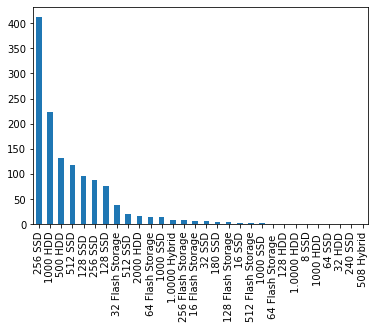

In [141]:
df['mem_1'].value_counts().plot(kind = 'bar')

In [142]:
df['mem_1'].value_counts()

256 SSD              412
1000 HDD             223
500 HDD              132
512 SSD              118
128 SSD               96
256 SSD               88
128 SSD               76
32 Flash Storage      38
512 SSD               20
2000 HDD              16
64 Flash Storage      15
1000 SSD              14
1.0000 Hybrid          9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
1000 SSD               2
64 Flash Storage       1
128 HDD                1
1.0000 HDD             1
8 SSD                  1
1000 HDD               1
64 SSD                 1
32 HDD                 1
240 SSD                1
508 Hybrid             1
Name: mem_1, dtype: int64

In [143]:
df['new_ssd_2'] = df['mem_2'].map(lambda x: x if 'SSD' in x else 0)

In [144]:
df.sample(50)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,HDD,new_ssd_2
739,Acer,Notebook,15.6,4,500 HDD,2.40,0,0,1366,768,...,21887.4240,0,1,0,0,500 HDD,0,0,500,0
9,Acer,Ultrabook,14.0,8,256 SSD,1.60,0,1,1920,1080,...,41025.6000,1,0,0,0,256 SSD,0,256 SSD,0,0
40,Asus,Notebook,15.6,4,1000 HDD,2.00,0,0,1920,1080,...,20725.9200,0,1,0,0,1000 HDD,0,0,1000,0
626,Mediacom,Notebook,14.0,2,32 Flash Storage,1.40,0,0,1920,1080,...,12733.9200,0,0,1,0,32 Flash Storage,0,0,0,0
615,Asus,Gaming,17.3,8,128 SSD + 1000 HDD,3.00,0,0,1920,1080,...,62231.0400,1,1,0,0,128 SSD,1000 HDD,128 SSD,1000,0
367,Lenovo,Gaming,15.6,8,128 SSD + 1000 HDD,2.40,0,1,1920,1080,...,43103.5200,1,1,0,0,128 SSD,1000 HDD,128 SSD,1000,0
249,Apple,Ultrabook,13.3,8,512 SSD,1.37,0,1,2560,1600,...,108691.2000,1,0,0,0,512 SSD,0,512 SSD,0,0
1114,Lenovo,2 in 1 Convertible,10.1,4,64 Flash Storage,0.69,1,1,1920,1200,...,29250.7200,0,0,1,0,64 Flash Storage,0,0,0,0
1247,Asus,Gaming,15.6,16,256 SSD + 1000 HDD,2.34,0,1,1920,1080,...,123876.0000,1,1,0,0,256 SSD,1000 HDD,256 SSD,1000,0
1288,Asus,Notebook,15.6,4,500 HDD,2.20,0,0,1366,768,...,19660.3200,0,1,0,0,500 HDD,0,0,500,0


In [145]:
df['new_ssd_2'].value_counts()

0            1299
  256 SSD       3
  512 SSD       1
Name: new_ssd_2, dtype: int64

In [146]:
df['new_ssd'] = df['new_ssd'].str.extract('(\d+)')
df['new_ssd_2'] = df['new_ssd_2'].str.extract('(\d+)')

In [147]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,Price,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,HDD,new_ssd_2
1210,Apple,Ultrabook,12.0,8,512 Flash Storage,0.92,0,1,2304,1440,...,68145.1200,0,0,1,0,512 Flash Storage,0,NaN,0,NaN
854,Asus,Notebook,15.6,8,256 SSD,2.30,0,1,1920,1080,...,41931.3600,1,0,0,0,256 SSD,0,256,0,NaN
544,Asus,Notebook,15.6,4,500 HDD,2.00,0,0,1366,768,...,18594.7200,0,1,0,0,500 HDD,0,NaN,500,NaN
121,MSI,Gaming,15.6,16,256 SSD + 2000 HDD,1.80,0,0,1920,1080,...,119427.1200,1,1,0,0,256 SSD,2000 HDD,256,2000,NaN
1118,Toshiba,Ultrabook,13.3,16,512 SSD,1.05,0,0,1920,1080,...,118601.2800,1,0,0,0,512 SSD,0,512,0,NaN
845,Dell,Notebook,15.6,4,256 SSD,2.18,0,0,1920,1080,...,39373.9200,1,0,0,0,256 SSD,0,256,0,NaN
1095,Acer,Notebook,15.6,8,256 SSD + 1000 HDD,2.40,0,0,1920,1080,...,42570.7200,1,1,0,0,256 SSD,1000 HDD,256,1000,NaN
1025,HP,Ultrabook,12.5,4,256 SSD,1.26,0,0,1366,768,...,83063.5200,1,0,0,0,256 SSD,0,256,0,NaN
338,Asus,Notebook,15.6,4,1000 HDD,2.00,0,0,1366,768,...,14651.4672,0,1,0,0,1000 HDD,0,NaN,1000,NaN
401,Asus,Gaming,17.3,16,256 SSD + 1000 HDD,2.90,0,0,1920,1080,...,81465.1200,1,1,0,0,256 SSD,1000 HDD,256,1000,NaN


In [148]:
df['new_ssd'] = df['new_ssd'].fillna('0')
df['new_ssd_2'] = df['new_ssd_2'].fillna('0')

In [149]:
df['new_ssd'] = df['new_ssd'].astype('int')
df['new_ssd_2'] = df['new_ssd_2'].astype('int')
df['SSD'] = df['new_ssd'] + df['new_ssd_2']

In [150]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,HDD,new_ssd_2,SSD
60,Dell,Notebook,17.3,16,256 SSD + 2000 HDD,2.80,0,0,1920,1080,...,1,1,0,0,256 SSD,2000 HDD,256,2000,0,256
43,Acer,Notebook,15.6,4,256 SSD,2.20,0,1,1920,1080,...,1,0,0,0,256 SSD,0,256,0,0,256
72,Dell,Notebook,15.6,8,256 SSD,2.20,0,0,1920,1080,...,1,0,0,0,256 SSD,0,256,0,0,256
126,HP,Notebook,14.0,8,1000 HDD,1.63,0,0,1920,1080,...,0,1,0,0,1000 HDD,0,0,1000,0,0
1001,HP,Notebook,13.3,8,256 SSD,1.34,0,1,1920,1080,...,1,0,0,0,256 SSD,0,256,0,0,256


In [151]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,HDD,new_ssd_2,SSD
438,Lenovo,Ultrabook,14.0,24,512 SSD,1.32,0,0,2560,1440,...,1,0,0,0,512 SSD,0,512,0,0,512
207,Dell,Ultrabook,13.3,8,256 SSD,1.21,1,1,4,2160,...,1,0,0,0,256 SSD,0,256,0,0,256
1054,Dell,Ultrabook,13.3,16,1000 SSD,1.20,1,0,3200,1800,...,1,0,0,0,1000 SSD,0,1000,0,0,1000
544,Asus,Notebook,15.6,4,500 HDD,2.00,0,0,1366,768,...,0,1,0,0,500 HDD,0,0,500,0,0
1301,HP,Notebook,15.6,6,1000 HDD,2.19,0,0,1366,768,...,0,1,0,0,1000 HDD,0,0,1000,0,0
1250,Dell,Notebook,15.6,4,500 HDD,2.20,0,0,1366,768,...,0,1,0,0,500 HDD,0,0,500,0,0
675,MSI,Gaming,15.6,16,256 SSD + 1000 HDD,2.40,0,0,1920,1080,...,1,1,0,0,256 SSD,1000 HDD,256,1000,0,256
19,Dell,Ultrabook,13.3,8,128 SSD,1.22,1,1,1920,1080,...,1,0,0,0,128 SSD,0,128,0,0,128
1219,Acer,2 in 1 Convertible,14.0,8,256 SSD,1.20,1,1,1920,1080,...,1,0,0,0,256 SSD,0,256,0,0,256
1170,HP,Notebook,15.6,8,256 SSD,1.96,0,0,1920,1080,...,1,0,0,0,256 SSD,0,256,0,0,256


In [152]:
new_1 = pd.concat([df['new_ssd'], df['new_ssd_2']], axis=1)

In [153]:
new_1

,new_ssd,new_ssd_2
0,128,0
1,0,0
2,256,0
3,512,0
4,256,0
...,...,...
1298,128,0
1299,512,0
1300,0,0
1301,0,0


In [154]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,ssd,hdd,flash_storage,hybrid,mem_1,mem_2,new_ssd,HDD,new_ssd_2,SSD
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,...,1,0,0,0,128 SSD,0,128,0,0,128
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,...,0,0,1,0,128 Flash Storage,0,0,0,0,0
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,...,1,0,0,0,256 SSD,0,256,0,0,256
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,...,1,0,0,0,512 SSD,0,512,0,0,512
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,...,1,0,0,0,256 SSD,0,256,0,0,256


In [155]:
df.drop(['new_ssd','new_ssd_2','ssd','hdd'], axis=1, inplace=True)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Ram            1303 non-null   int64  
 4   Memory         1303 non-null   object 
 5   Weight         1303 non-null   float64
 6   Touch_screen   1303 non-null   int64  
 7   IPS_Panels     1303 non-null   int64  
 8   X_res          1303 non-null   int64  
 9   y_res          1303 non-null   int64  
 10  cpu_name       1303 non-null   object 
 11  OS Type        1303 non-null   object 
 12  gpu            1303 non-null   object 
 13  Price          1303 non-null   float64
 14  flash_storage  1303 non-null   int64  
 15  hybrid         1303 non-null   int64  
 16  mem_1          1303 non-null   object 
 17  mem_2          1303 non-null   object 
 18  HDD     

In [157]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,flash_storage,hybrid,mem_1,mem_2,HDD,SSD
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832,0,0,128 SSD,0,0,128
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232,1,0,128 Flash Storage,0,0,0
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000,0,0,256 SSD,0,0,256
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360,0,0,512 SSD,0,0,512
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080,0,0,256 SSD,0,0,256


In [158]:
df['flash_storage'] = df['Memory'].map(lambda x: x if 'Flash Storage' in x else 0)

In [159]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,flash_storage,hybrid,mem_1,mem_2,HDD,SSD
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832,0,0,128 SSD,0,0,128
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232,128 Flash Storage,0,128 Flash Storage,0,0,0
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000,0,0,256 SSD,0,0,256
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360,0,0,512 SSD,0,0,512
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080,0,0,256 SSD,0,0,256


In [160]:
df['flash_storage'].value_counts()

0                               1228
32 Flash Storage                  38
64 Flash Storage                  15
256 Flash Storage                  8
16 Flash Storage                   7
128 Flash Storage                  4
512 Flash Storage                  2
64 Flash Storage +  1000 HDD       1
Name: flash_storage, dtype: int64

In [161]:
df['flash_storage'] = df['flash_storage'].str.extract('(\d+)')

In [162]:
df['flash_storage'] = df['flash_storage'].fillna('0')
df['flash_storage'] = df['flash_storage'].astype('int')

In [163]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,flash_storage,hybrid,mem_1,mem_2,HDD,SSD
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832,0,0,128 SSD,0,0,128
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232,128,0,128 Flash Storage,0,0,0
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000,0,0,256 SSD,0,0,256
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360,0,0,512 SSD,0,0,512
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080,0,0,256 SSD,0,0,256


In [164]:
df['flash_storage_2'] = df['mem_2'].map(lambda x: x if 'Flash Storage' in x else 0)

In [165]:
df['flash_storage_2'].value_counts()

0    1303
Name: flash_storage_2, dtype: int64

In [166]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,OS Type,gpu,Price,flash_storage,hybrid,mem_1,mem_2,HDD,SSD,flash_storage_2
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,...,MacOS,Intel,71378.6832,0,0,128 SSD,0,0,128,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,...,MacOS,Intel,47895.5232,128,0,128 Flash Storage,0,0,0,0
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,...,No OS/ Other OS,Intel,30636.0000,0,0,256 SSD,0,0,256,0
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,...,MacOS,AMD,135195.3360,0,0,512 SSD,0,0,512,0
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,...,MacOS,Intel,96095.8080,0,0,256 SSD,0,0,256,0


In [167]:
df['flash_storage_2'] = df['flash_storage_2'].astype('int')

In [168]:
df['Flash_Storage'] = df['flash_storage'] + df['flash_storage_2']

In [169]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,gpu,Price,flash_storage,hybrid,mem_1,mem_2,HDD,SSD,flash_storage_2,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,...,Intel,71378.6832,0,0,128 SSD,0,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,...,Intel,47895.5232,128,0,128 Flash Storage,0,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,...,Intel,30636.0000,0,0,256 SSD,0,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,...,AMD,135195.3360,0,0,512 SSD,0,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,...,Intel,96095.8080,0,0,256 SSD,0,0,256,0,0


In [170]:
df.drop(['flash_storage','flash_storage_2'], axis=1, inplace=True)

In [171]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,hybrid,mem_1,mem_2,HDD,SSD,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832,0,128 SSD,0,0,128,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232,0,128 Flash Storage,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000,0,256 SSD,0,0,256,0
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360,0,512 SSD,0,0,512,0
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080,0,256 SSD,0,0,256,0


In [172]:
df['mem_1'].value_counts()

256 SSD              412
1000 HDD             223
500 HDD              132
512 SSD              118
128 SSD               96
256 SSD               88
128 SSD               76
32 Flash Storage      38
512 SSD               20
2000 HDD              16
64 Flash Storage      15
1000 SSD              14
1.0000 Hybrid          9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
1000 SSD               2
64 Flash Storage       1
128 HDD                1
1.0000 HDD             1
8 SSD                  1
1000 HDD               1
64 SSD                 1
32 HDD                 1
240 SSD                1
508 Hybrid             1
Name: mem_1, dtype: int64

In [173]:
df['hybrid'] = df['mem_1'].map(lambda x: x if 'Hybrid' in x else 0)

In [174]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,hybrid,mem_1,mem_2,HDD,SSD,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832,0,128 SSD,0,0,128,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232,0,128 Flash Storage,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000,0,256 SSD,0,0,256,0
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360,0,512 SSD,0,0,512,0
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080,0,256 SSD,0,0,256,0


In [175]:
df['hybrid'].value_counts()

0                1293
1.0000 Hybrid       9
508 Hybrid          1
Name: hybrid, dtype: int64

In [176]:
df['hybrid_2'] = df['mem_2'].map(lambda x: x if 'Hybrid' in x else 0)

In [177]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,OS Type,gpu,Price,hybrid,mem_1,mem_2,HDD,SSD,Flash_Storage,hybrid_2
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,...,MacOS,Intel,71378.6832,0,128 SSD,0,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,...,MacOS,Intel,47895.5232,0,128 Flash Storage,0,0,0,128,0
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,...,No OS/ Other OS,Intel,30636.0000,0,256 SSD,0,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,...,MacOS,AMD,135195.3360,0,512 SSD,0,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,...,MacOS,Intel,96095.8080,0,256 SSD,0,0,256,0,0


In [178]:
df['hybrid_2'].value_counts()

0                  1301
  1.0000 Hybrid       2
Name: hybrid_2, dtype: int64

In [179]:
df['hybrid'] = df['hybrid'].str.extract('(\d+)')

In [180]:
df['hybrid'] = df['hybrid'].fillna('0')
df['hybrid'] = df['hybrid'].astype('int')
df['hybrid_2'] = df['hybrid_2'].str.extract('(\d+)')
df['hybrid_2'] = df['hybrid_2'].fillna('0')
df['hybrid_2'] = df['hybrid_2'].astype('int')

In [181]:
df['Hybrid'] = df['hybrid'] + df['hybrid_2']

In [182]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,...,gpu,Price,hybrid,mem_1,mem_2,HDD,SSD,Flash_Storage,hybrid_2,Hybrid
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,...,Intel,71378.6832,0,128 SSD,0,0,128,0,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,...,Intel,47895.5232,0,128 Flash Storage,0,0,0,128,0,0
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,...,Intel,30636.0000,0,256 SSD,0,0,256,0,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,...,AMD,135195.3360,0,512 SSD,0,0,512,0,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,...,Intel,96095.8080,0,256 SSD,0,0,256,0,0,0


In [183]:
df.drop(['hybrid','hybrid_2'], axis=1, inplace=True)

In [184]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,mem_1,mem_2,HDD,SSD,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832,128 SSD,0,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232,128 Flash Storage,0,0,0,128,0
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000,256 SSD,0,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360,512 SSD,0,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080,256 SSD,0,0,256,0,0


In [185]:
df.corr()['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Touch_screen     0.191226
IPS_Panels       0.252208
X_res            0.083832
y_res            0.552809
Price            1.000000
HDD             -0.095476
SSD              0.670799
Flash_Storage   -0.040511
Hybrid          -0.004769
Name: Price, dtype: float64

In [186]:
# let's remove hybrid, flash_storage, mem_1, and mem_2
df.drop(['Hybrid','Flash_Storage','mem_1','mem_2'], axis=1, inplace=True)

In [187]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,Price,HDD,SSD
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,71378.6832,0,128
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,47895.5232,0,0
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,30636.0000,0,256
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,135195.3360,0,512
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,96095.8080,0,256


In [188]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Memory', 'Weight',
       'Touch_screen', 'IPS_Panels', 'X_res', 'y_res', 'cpu_name', 'OS Type',
       'gpu', 'Price', 'HDD', 'SSD'],
      dtype='object')

In [189]:
df = df[['Company', 'TypeName','Inches', 'Ram', 'Memory', 'Weight', 'Touch_screen',
       'IPS_Panels', 'X_res', 'y_res', 'cpu_name', 'OS Type', 'gpu', 'HDD', 'SSD','Price'
       ]]

In [190]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,HDD,SSD,Price
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,0,128,71378.6832
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,0,0,47895.5232
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,0,256,30636.0000
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,0,512,135195.3360
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,0,256,96095.8080


In [191]:
data = df.copy()

In [192]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,HDD,SSD,Price
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,0,128,71378.6832
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,0,0,47895.5232
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,0,256,30636.0000
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,0,512,135195.3360
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,0,256,96095.8080


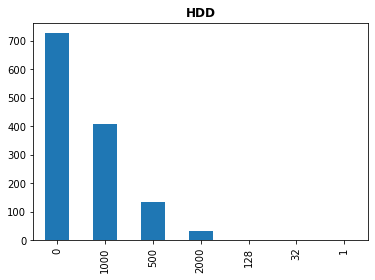

In [193]:
plot_univariables('HDD','HDD')

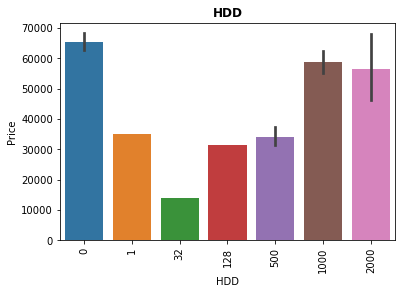

In [194]:
plot_multivariate('HDD','HDD')

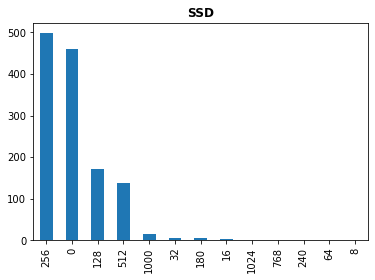

In [195]:
plot_univariables('SSD','SSD')

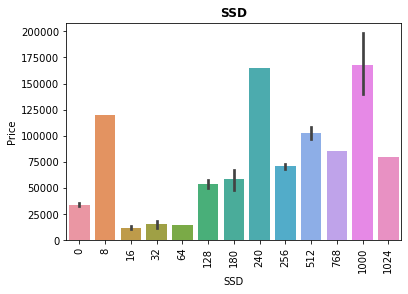

In [196]:
plot_multivariate('SSD','SSD')

In [197]:
data.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Touch_screen    0.191226
IPS_Panels      0.252208
X_res           0.083832
y_res           0.552809
HDD            -0.095476
SSD             0.670799
Price           1.000000
Name: Price, dtype: float64

In [198]:
data['X_res']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: int64

In [199]:
np.sqrt((data['X_res']**2)+ (data['y_res']**2)/ data['Inches'])

0       2597.321929
1       1460.993585
2       1939.373412
3       2916.297243
4       2597.321929
           ...     
1298    1941.575207
1299    3237.840179
1300    1381.334965
1301    1379.769992
1302    1379.769992
Length: 1303, dtype: float64

In [200]:
data['pixels_per_inch'] = ((data['X_res']**2)+ (data['y_res']**2))**0.5/ data['Inches']

In [201]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,X_res,y_res,cpu_name,OS Type,gpu,HDD,SSD,Price,pixels_per_inch
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,0,128,71378.6832,226.983005
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,1440,900,Intel Core i5,MacOS,Intel,0,0,47895.5232,127.677940
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,1920,1080,Intel Core i5,No OS/ Other OS,Intel,0,256,30636.0000,141.211998
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,2880,1800,Intel Core i7,MacOS,AMD,0,512,135195.3360,220.534624
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,2560,1600,Intel Core i5,MacOS,Intel,0,256,96095.8080,226.983005


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   TypeName         1303 non-null   object 
 2   Inches           1303 non-null   float64
 3   Ram              1303 non-null   int64  
 4   Memory           1303 non-null   object 
 5   Weight           1303 non-null   float64
 6   Touch_screen     1303 non-null   int64  
 7   IPS_Panels       1303 non-null   int64  
 8   X_res            1303 non-null   int64  
 9   y_res            1303 non-null   int64  
 10  cpu_name         1303 non-null   object 
 11  OS Type          1303 non-null   object 
 12  gpu              1303 non-null   object 
 13  HDD              1303 non-null   int64  
 14  SSD              1303 non-null   int64  
 15  Price            1303 non-null   float64
 16  pixels_per_inch  1303 non-null   float64
dtypes: float64(4),

In [203]:
data.corr()['Price']

Inches             0.068197
Ram                0.743007
Weight             0.210370
Touch_screen       0.191226
IPS_Panels         0.252208
X_res              0.083832
y_res              0.552809
HDD               -0.095476
SSD                0.670799
Price              1.000000
pixels_per_inch    0.348331
Name: Price, dtype: float64

In [204]:
data.drop(['X_res','y_res'], axis=1, inplace=True)

In [205]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,cpu_name,OS Type,gpu,HDD,SSD,Price,pixels_per_inch
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,Intel Core i5,MacOS,Intel,0,128,71378.6832,226.983005
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,Intel Core i5,MacOS,Intel,0,0,47895.5232,127.677940
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,Intel Core i5,No OS/ Other OS,Intel,0,256,30636.0000,141.211998
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,Intel Core i7,MacOS,AMD,0,512,135195.3360,220.534624
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,Intel Core i5,MacOS,Intel,0,256,96095.8080,226.983005


In [206]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Memory', 'Weight',
       'Touch_screen', 'IPS_Panels', 'cpu_name', 'OS Type', 'gpu', 'HDD',
       'SSD', 'Price', 'pixels_per_inch'],
      dtype='object')

In [207]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,cpu_name,OS Type,gpu,HDD,SSD,Price,pixels_per_inch
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,Intel Core i5,MacOS,Intel,0,128,71378.6832,226.983005
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,Intel Core i5,MacOS,Intel,0,0,47895.5232,127.677940
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,Intel Core i5,No OS/ Other OS,Intel,0,256,30636.0000,141.211998
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,Intel Core i7,MacOS,AMD,0,512,135195.3360,220.534624
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,Intel Core i5,MacOS,Intel,0,256,96095.8080,226.983005


In [208]:
data = data[['Company', 'TypeName', 'Inches', 'Ram', 'Memory', 'Weight',
       'Touch_screen', 'IPS_Panels', 'cpu_name', 'OS Type', 'gpu', 'HDD',
       'SSD', 'pixels_per_inch','Price']]

In [209]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Touch_screen,IPS_Panels,cpu_name,OS Type,gpu,HDD,SSD,pixels_per_inch,Price
0,Apple,Ultrabook,13.3,8,128 SSD,1.37,0,1,Intel Core i5,MacOS,Intel,0,128,226.983005,71378.6832
1,Apple,Ultrabook,13.3,8,128 Flash Storage,1.34,0,0,Intel Core i5,MacOS,Intel,0,0,127.677940,47895.5232
2,HP,Notebook,15.6,8,256 SSD,1.86,0,0,Intel Core i5,No OS/ Other OS,Intel,0,256,141.211998,30636.0000
3,Apple,Ultrabook,15.4,16,512 SSD,1.83,0,1,Intel Core i7,MacOS,AMD,0,512,220.534624,135195.3360
4,Apple,Ultrabook,13.3,8,256 SSD,1.37,0,1,Intel Core i5,MacOS,Intel,0,256,226.983005,96095.8080


In [210]:
data.corr()['Price']

Inches             0.068197
Ram                0.743007
Weight             0.210370
Touch_screen       0.191226
IPS_Panels         0.252208
HDD               -0.095476
SSD                0.670799
pixels_per_inch    0.348331
Price              1.000000
Name: Price, dtype: float64

In [211]:
data.drop('Inches', axis=1, inplace=True)

In [212]:
data.corr()['Price']

Ram                0.743007
Weight             0.210370
Touch_screen       0.191226
IPS_Panels         0.252208
HDD               -0.095476
SSD                0.670799
pixels_per_inch    0.348331
Price              1.000000
Name: Price, dtype: float64

In [213]:
data.sample(20)

,Company,TypeName,Ram,Memory,Weight,Touch_screen,IPS_Panels,cpu_name,OS Type,gpu,HDD,SSD,pixels_per_inch,Price
357,Dell,Gaming,8,1000 HDD,2.65,0,0,Intel Core i5,Windows,Nvidia,1000,0,141.211998,53226.720
996,HP,Ultrabook,8,256 SSD,1.11,1,1,Intel Core i7,Windows,Intel,0,256,165.632118,71874.720
185,Dell,Notebook,16,512 SSD,2.77,1,0,Intel Core i7,Windows,Nvidia,0,512,127.335675,82530.720
277,Acer,Notebook,8,1000 HDD,2.20,0,1,Intel Core i7,Windows,Nvidia,1000,0,141.211998,39693.600
16,Dell,Notebook,8,256 SSD,2.20,0,0,Intel Core i7,Windows,AMD,0,256,141.211998,39693.600
4,Apple,Ultrabook,8,256 SSD,1.37,0,1,Intel Core i5,MacOS,Intel,0,256,226.983005,96095.808
889,Lenovo,Notebook,4,500 HDD,2.80,0,0,AMD Processor,Windows,AMD,500,0,106.113062,20193.120
161,Acer,Notebook,4,256 SSD,3.00,0,1,Intel Core i5,Windows,Nvidia,0,256,127.335675,42890.400
753,Lenovo,Ultrabook,4,180 SSD,1.70,0,0,Intel Core i5,Windows,Intel,0,180,157.350512,58394.880
936,Dell,Notebook,4,1000 HDD,2.18,0,0,Intel Core i3,Windows,Intel,1000,0,100.454670,29762.208


In [214]:
data.head()

,Company,TypeName,Ram,Memory,Weight,Touch_screen,IPS_Panels,cpu_name,OS Type,gpu,HDD,SSD,pixels_per_inch,Price
0,Apple,Ultrabook,8,128 SSD,1.37,0,1,Intel Core i5,MacOS,Intel,0,128,226.983005,71378.6832
1,Apple,Ultrabook,8,128 Flash Storage,1.34,0,0,Intel Core i5,MacOS,Intel,0,0,127.677940,47895.5232
2,HP,Notebook,8,256 SSD,1.86,0,0,Intel Core i5,No OS/ Other OS,Intel,0,256,141.211998,30636.0000
3,Apple,Ultrabook,16,512 SSD,1.83,0,1,Intel Core i7,MacOS,AMD,0,512,220.534624,135195.3360
4,Apple,Ultrabook,8,256 SSD,1.37,0,1,Intel Core i5,MacOS,Intel,0,256,226.983005,96095.8080


In [215]:
data.corr()['Price']

Ram                0.743007
Weight             0.210370
Touch_screen       0.191226
IPS_Panels         0.252208
HDD               -0.095476
SSD                0.670799
pixels_per_inch    0.348331
Price              1.000000
Name: Price, dtype: float64

In [216]:
data.isnull().sum()

Company            0
TypeName           0
Ram                0
Memory             0
Weight             0
Touch_screen       0
IPS_Panels         0
cpu_name           0
OS Type            0
gpu                0
HDD                0
SSD                0
pixels_per_inch    0
Price              0
dtype: int64

In [217]:
data.drop('Memory', axis=1, inplace=True)

In [218]:
df = data.copy()

In [219]:
df.head()

,Company,TypeName,Ram,Weight,Touch_screen,IPS_Panels,cpu_name,OS Type,gpu,HDD,SSD,pixels_per_inch,Price
0,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,MacOS,Intel,0,128,226.983005,71378.6832
1,Apple,Ultrabook,8,1.34,0,0,Intel Core i5,MacOS,Intel,0,0,127.677940,47895.5232
2,HP,Notebook,8,1.86,0,0,Intel Core i5,No OS/ Other OS,Intel,0,256,141.211998,30636.0000
3,Apple,Ultrabook,16,1.83,0,1,Intel Core i7,MacOS,AMD,0,512,220.534624,135195.3360
4,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,MacOS,Intel,0,256,226.983005,96095.8080


In [220]:
df = df[df['gpu']!='ARM']

In [221]:
df.head()

,Company,TypeName,Ram,Weight,Touch_screen,IPS_Panels,cpu_name,OS Type,gpu,HDD,SSD,pixels_per_inch,Price
0,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,MacOS,Intel,0,128,226.983005,71378.6832
1,Apple,Ultrabook,8,1.34,0,0,Intel Core i5,MacOS,Intel,0,0,127.677940,47895.5232
2,HP,Notebook,8,1.86,0,0,Intel Core i5,No OS/ Other OS,Intel,0,256,141.211998,30636.0000
3,Apple,Ultrabook,16,1.83,0,1,Intel Core i7,MacOS,AMD,0,512,220.534624,135195.3360
4,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,MacOS,Intel,0,256,226.983005,96095.8080


In [222]:
from sklearn.model_selection import train_test_split

In [223]:
X = df.iloc[:,:-1]

In [224]:
X

,Company,TypeName,Ram,Weight,Touch_screen,IPS_Panels,cpu_name,OS Type,gpu,HDD,SSD,pixels_per_inch
0,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,MacOS,Intel,0,128,226.983005
1,Apple,Ultrabook,8,1.34,0,0,Intel Core i5,MacOS,Intel,0,0,127.677940
2,HP,Notebook,8,1.86,0,0,Intel Core i5,No OS/ Other OS,Intel,0,256,141.211998
3,Apple,Ultrabook,16,1.83,0,1,Intel Core i7,MacOS,AMD,0,512,220.534624
4,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,MacOS,Intel,0,256,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,Intel Core i7,Windows,Intel,0,128,157.350512
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,Intel Core i7,Windows,Intel,0,512,276.053530
1300,Lenovo,Notebook,2,1.50,0,0,Other Intel Processor,Windows,Intel,0,0,111.935204
1301,HP,Notebook,6,2.19,0,0,Intel Core i7,Windows,AMD,1000,0,100.454670


In [225]:
y = df.iloc[:,-1]

/Users/akshaybhat/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

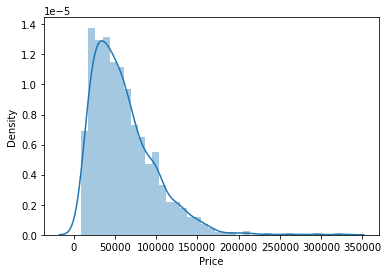

In [226]:
sns.distplot(y)

# The price is skewed 

In [227]:
y = np.log(y)
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

/Users/akshaybhat/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

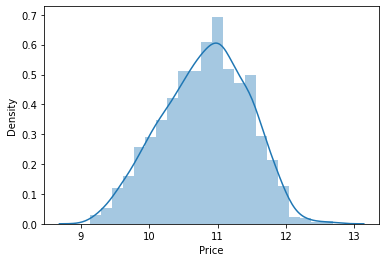

In [228]:
sns.distplot(y)

In [229]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [231]:
X_train

,Company,TypeName,Ram,Weight,Touch_screen,IPS_Panels,cpu_name,OS Type,gpu,HDD,SSD,pixels_per_inch
853,Lenovo,Ultrabook,8,1.96,0,1,Intel Core i7,Windows,Nvidia,0,256,157.350512
916,HP,Notebook,8,1.49,0,0,Intel Core i5,Windows,Intel,0,256,165.632118
1034,HP,Notebook,8,1.84,0,0,Intel Core i7,Windows,Intel,0,256,141.211998
912,Lenovo,Notebook,6,2.20,0,0,Intel Core i7,Windows,Nvidia,0,256,141.211998
252,Asus,Notebook,4,1.68,0,0,AMD Processor,Windows,AMD,1000,0,100.454670
...,...,...,...,...,...,...,...,...,...,...,...,...
763,Asus,Ultrabook,8,1.20,0,1,Intel Core i5,Windows,Intel,0,256,276.053530
835,Dell,Gaming,16,3.21,0,0,Intel Core i7,Windows,Nvidia,1000,256,141.211998
1217,Lenovo,Notebook,8,2.80,0,0,Intel Core i5,No OS/ Other OS,Intel,1000,0,106.113062
559,Dell,Notebook,4,2.18,0,0,Intel Core i3,Windows,AMD,1000,0,100.454670


In [232]:
X_test

,Company,TypeName,Ram,Weight,Touch_screen,IPS_Panels,cpu_name,OS Type,gpu,HDD,SSD,pixels_per_inch
580,Mediacom,Notebook,4,1.45,0,1,Other Intel Processor,Windows,Intel,0,32,157.350512
1017,Lenovo,Notebook,16,2.40,0,1,Intel Core i7,Windows,Nvidia,0,512,124.855705
761,Dell,Ultrabook,16,1.18,0,0,Intel Core i7,Windows,Intel,0,256,176.232574
686,HP,Notebook,4,1.86,0,0,Intel Core i5,Windows,AMD,500,0,100.454670
186,Dell,Notebook,16,2.06,1,0,Intel Core i7,Windows,Nvidia,0,512,138.461776
...,...,...,...,...,...,...,...,...,...,...,...,...
1278,Dell,Notebook,2,2.20,0,0,Other Intel Processor,Windows,Intel,500,0,100.454670
961,Lenovo,Ultrabook,8,1.36,0,1,Intel Core i5,Windows,Intel,0,256,176.232574
658,Lenovo,Gaming,8,3.31,0,1,Intel Core i7,Windows,Nvidia,1000,128,141.211998
82,HP,Notebook,8,1.63,0,0,Intel Core i5,Windows,Intel,0,256,157.350512


In [233]:
X_train.shape

(976, 12)

In [234]:
X_test.shape

(326, 12)

In [235]:
y_train.shape

(976,)

In [236]:
y_test.shape

(326,)

In [237]:
step_1 = ColumnTransformer(transformers= [('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,6,7,8])],remainder='passthrough')

In [238]:
step_1

ColumnTransformer(remainder='passthrough',
                  transformers=[('col_tnf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 [0, 1, 6, 7, 8])])

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   TypeName         1303 non-null   object 
 2   Ram              1303 non-null   int64  
 3   Weight           1303 non-null   float64
 4   Touch_screen     1303 non-null   int64  
 5   IPS_Panels       1303 non-null   int64  
 6   cpu_name         1303 non-null   object 
 7   OS Type          1303 non-null   object 
 8   gpu              1303 non-null   object 
 9   HDD              1303 non-null   int64  
 10  SSD              1303 non-null   int64  
 11  pixels_per_inch  1303 non-null   float64
 12  Price            1303 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 132.5+ KB


In [240]:
data.head()

,Company,TypeName,Ram,Weight,Touch_screen,IPS_Panels,cpu_name,OS Type,gpu,HDD,SSD,pixels_per_inch,Price
0,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,MacOS,Intel,0,128,226.983005,71378.6832
1,Apple,Ultrabook,8,1.34,0,0,Intel Core i5,MacOS,Intel,0,0,127.677940,47895.5232
2,HP,Notebook,8,1.86,0,0,Intel Core i5,No OS/ Other OS,Intel,0,256,141.211998,30636.0000
3,Apple,Ultrabook,16,1.83,0,1,Intel Core i7,MacOS,AMD,0,512,220.534624,135195.3360
4,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,MacOS,Intel,0,256,226.983005,96095.8080


In [241]:
data['cpu_name'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: cpu_name, dtype: int64

In [242]:
data['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
LG             3
Fujitsu        3
Google         3
Chuwi          3
Huawei         2
Name: Company, dtype: int64

In [243]:
data['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [244]:
data['OS Type'].value_counts()

Windows            1125
No OS/ Other OS      95
Linux                62
MacOS                21
Name: OS Type, dtype: int64

In [245]:
data['gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu, dtype: int64

/Users/akshaybhat/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

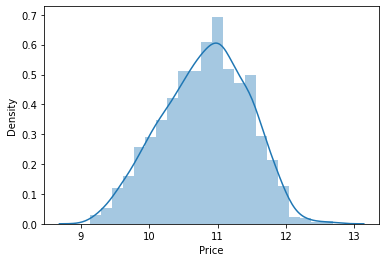

In [246]:
sns.distplot(np.log(df['Price']))

# Ridge Regression

In [258]:
step_1 = ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,6,7,8])
],remainder='passthrough')

step_2 = Ridge()

pipe = Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test, y_pred))
print('MSE',mean_absolute_error(y_test, y_pred))

R2 Score 0.7620458347286431
MSE 0.21968774847277692


# Lasso Regression

In [259]:
step_1 = ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,6,7,8])
],remainder='passthrough')

step_2 = Lasso()

pipe = Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test, y_pred))
print('MSE',mean_absolute_error(y_test, y_pred))

R2 Score 0.5379122482053659
MSE 0.31664390252276226


# Linear Regression

In [260]:
step_1 = ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,6,7,8])
],remainder='passthrough')

step_2 = LinearRegression()

pipe = Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test, y_pred))
print('MSE',mean_absolute_error(y_test, y_pred))

R2 Score 0.7617106916999632
MSE 0.22001381295841396


# RandomForest 

In [261]:
step_1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,6,7,8])
],remainder='passthrough')

step_2 = RandomForestRegressor()

RF_pipe = Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test, y_pred))
print('MSE',mean_absolute_error(y_test, y_pred))

R2 Score 0.7617106916999632
MSE 0.22001381295841396


# Adaboost

In [262]:
step_1 = ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,6,7,8])
], remainder='passthrough')

step_2 = AdaBoostRegressor()

pipe = Pipeline([
    ('step_1',step_1),
    ('step_2', step_2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test, y_pred))
print('MSE',mean_absolute_error(y_test, y_pred))

R2 Score 0.7857168542325101
MSE 0.2197912586562861


# ExtraTrees Regressor

In [263]:
step_1 = ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,6,7,8])
],remainder='passthrough')

step_2 = ExtraTreesRegressor()

pipe = Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test, y_pred))
print('MSE',mean_absolute_error(y_test, y_pred))

R2 Score 0.8064338358838032
MSE 0.18473552255749687


# Gradient Boosting Regressor

In [267]:
step_1 = ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,6,7,8])
],remainder='passthrough')

step_2 = GradientBoostingRegressor()

pipe = Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test, y_pred))
print('MSE',mean_absolute_error(y_test, y_pred))

R2 Score 0.8524613498798804
MSE 0.17214102119997418


# DecisionTree Regressor

In [265]:
step_1 = ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,6,7,8])
],remainder='passthrough')

step_2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test, y_pred))
print('MSE',mean_absolute_error(y_test, y_pred))

R2 Score 0.7957144371693567
MSE 0.19722514834920643


# KNeighbor Regressor

In [266]:
step_1 = ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,6,7,8])
],remainder='passthrough')

step_2 = KNeighborsRegressor()

pipe = Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test, y_pred))
print('MSE',mean_absolute_error(y_test, y_pred))

R2 Score 0.7626000521350679
MSE 0.2172347723300028


# Support Vector Regressor

In [257]:
step_1 = ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,6,7,8])
],remainder='passthrough')

step_2 = SVR()

pipe = Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test, y_pred))
print('MSE',mean_absolute_error(y_test, y_pred))

R2 Score 0.5833468389480916
MSE 0.2949564650716796


In [ ]:
df.head()

In [ ]:
df['HDD'].value_counts()

In [ ]:
df['SSD'].value_counts()

In [ ]:
df['Ram'].value_counts()

# Randomforest Regressor is the best model with highest R2 Score and minimum MSE

In [268]:
# model dumping
import pickle
pickle.dump(pipe, open('gb_model.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))